# Exploratory Data Analysis - Movie Recommendation System

This notebook provides a comprehensive exploratory data analysis of the finalized movie dataset, including statistical analysis, and visual insights.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import ast
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

## 2. Load Data

In [2]:
df = pd.read_csv('../data/final/sample.csv')
# Convert string representation of lists to actual lists for genres
def parse_genres(x):
    if isinstance(x, str):
        try:
            # Try JSON parsing first
            return json.loads(x)
        except json.JSONDecodeError:
            # Fallback: strip brackets and split by comma
            return [i.strip().strip("'\"") for i in x.strip("[]").split(",")]
    return x

df['genres'] = df['genres'].apply(parse_genres)
df.head()

,movieId,title,genres,imdbId,tmdbId,positive_users,negative_users,positive_count,negative_count,id,...,runtime,adult,budget,imdb_id,original_language,overview,poster_path,production_companies,keywords,tmdb_id
0,287609,The Blackening,[Comedy|Horror],11703244,1008392.0,"[89069, 133131, 140928, 171016, 196232, 322242]","[7697, 11969, 53793, 56646, 104255, 111672, 18...",6,10,1008392,...,97,False,5000000,tt11703244,en,"Seven black friends go away for the weekend, o...",/ooB4KSRRhp7XYRQUmsi82iFnMNC.jpg,"MRC, CatchLight Studios, Artists First, Tracy ...","parody, cabin, slasher, group of friends, raci...",1008392
1,92600,"As Luck Would Have It (Chispa de la vida, La)",[Drama],1808240,84797.0,"[54742, 143390, 171724, 246119, 301485]","[42650, 133020, 189614]",5,3,84797,...,98,False,0,tt1808240,es,Roberto is an unemployed publicist who achieve...,/fc2uI5IKFmDIahnAkjne6bAxp2I.jpg,"Alfresco Enterprises, Trivisión S.L., La Ferme...","publicity, dark comedy, social satire, cartage...",84797
2,235459,"Crack: Cocaine, Corruption & Conspiracy",[Documentary],13649700,776142.0,"[29540, 66386, 114446, 126432, 324480]","[85474, 87071, 231769]",5,3,776142,...,89,False,0,tt13649700,en,"A cheap, powerful drug emerges during a recess...",/vVKWtkgwCd34wT10v0Bwg1NYYcc.jpg,Firelight Films,"drug smuggling, drug addiction, cocaine, drug ...",776142
3,232239,Monday,[Drama],8884906,550524.0,"[5147, 142640]","[102062, 122344, 133681, 183281, 200769, 22856...",2,8,550524,...,116,False,0,tt8884906,en,A spark on a Friday can lead to a sizzling wee...,/o4Gc5quiCBtiW6mgkPvDWKAiFVs.jpg,"Faliro House Productions, Automatik Entertainm...","expatriate, self destructiveness",550524
4,288653,Snoopy Presents: Lucy's School,[Animation|Children],21405896,975490.0,[],[33012],0,1,975490,...,38,False,0,tt21405896,en,The Peanuts gang is nervous about going to a n...,/lJgiZrEIH3LKEwiZjWmpWDPETrT.jpg,"WildBrain Studios, Charles M. Schulz Creative ...","friendship, teacher, school, overcoming fears,...",975490


## 3. Data Analysis

### 3.1. Initial Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10666 entries, 0 to 10665
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               10666 non-null  int64  
 1   title                 10666 non-null  object 
 2   genres                10666 non-null  object 
 3   imdbId                10666 non-null  int64  
 4   tmdbId                10666 non-null  float64
 5   positive_users        10666 non-null  object 
 6   negative_users        10666 non-null  object 
 7   positive_count        10666 non-null  int64  
 8   negative_count        10666 non-null  int64  
 9   id                    10666 non-null  int64  
 10  vote_average          10666 non-null  float64
 11  vote_count            10666 non-null  int64  
 12  status                10666 non-null  object 
 13  release_date          10666 non-null  object 
 14  revenue               10666 non-null  int64  
 15  runtime            

In [4]:
df.describe()

,movieId,imdbId,tmdbId,positive_count,negative_count,id,vote_average,vote_count,revenue,runtime,budget,tmdb_id
count,10666.000000,1.066600e+04,1.066600e+04,10666.000000,10666.000000,1.066600e+04,10666.000000,10666.000000,1.066600e+04,10666.000000,1.066600e+04,1.066600e+04
mean,177696.233827,5.188157e+06,3.610205e+05,195.163698,70.031127,3.610205e+05,6.371142,727.725764,2.832345e+07,98.914495,9.291530e+06,3.610205e+05
std,59042.611138,4.244899e+06,2.455356e+05,1172.162057,252.837909,2.455356e+05,1.106716,2083.954557,1.177828e+08,28.157061,2.893836e+07,2.455356e+05
min,53519.000000,1.000095e+06,1.731000e+03,0.000000,0.000000,1.731000e+03,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.731000e+03
25%,132503.500000,1.851929e+06,1.388765e+05,1.000000,1.000000,1.388765e+05,5.692000,21.000000,0.000000e+00,88.000000,0.000000e+00,1.388765e+05
50%,179088.000000,3.823403e+06,3.511085e+05,4.000000,5.000000,3.511085e+05,6.600000,79.000000,0.000000e+00,98.000000,0.000000e+00,3.511085e+05
75%,217869.000000,7.121892e+06,5.131925e+05,29.000000,24.000000,5.131925e+05,7.108750,392.750000,3.549168e+06,112.000000,3.800000e+06,5.131925e+05
max,288949.000000,2.790630e+07,1.134865e+06,50108.000000,5311.000000,1.134865e+06,10.000000,34495.000000,2.320250e+09,540.000000,4.600000e+08,1.134865e+06


### 3.2. Missing Values Analysis

In [5]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Count', 'Percent'])

,Missing Count,Percent
movieId,0,0.0
title,0,0.0
genres,0,0.0
imdbId,0,0.0
tmdbId,0,0.0
positive_users,0,0.0
negative_users,0,0.0
positive_count,0,0.0
negative_count,0,0.0
id,0,0.0


### 3.3. Statistical Analysis of Numerical Columns

In [6]:
numerical_cols = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget']
df[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max'])

,vote_average,vote_count,revenue,runtime,budget
mean,6.371142,727.725764,2.832345e+07,98.914495,9.291530e+06
median,6.600000,79.000000,0.000000e+00,98.000000,0.000000e+00
std,1.106716,2083.954557,1.177828e+08,28.157061,2.893836e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
max,10.000000,34495.000000,2.320250e+09,540.000000,4.600000e+08


## 4. Visualizations

### 4.1. Vote Average Distribution

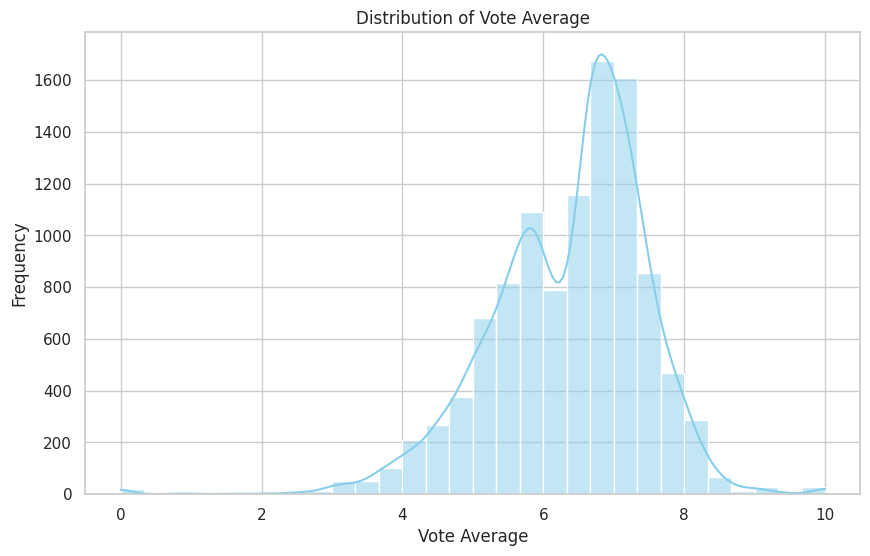

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

### 4.2. Top 10 Movie Genres

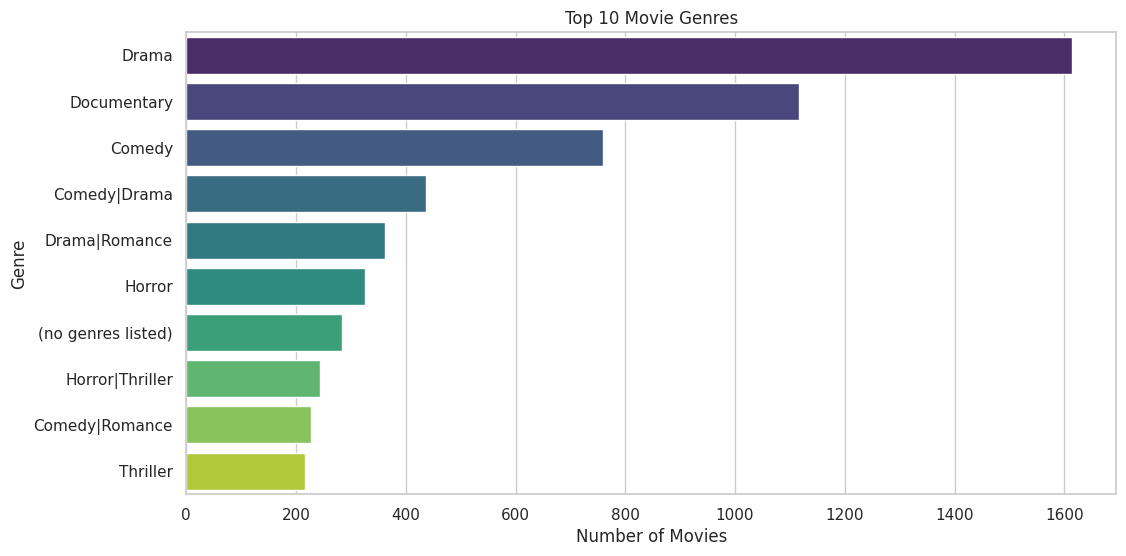

In [8]:
all_genres = [genre for sublist in df['genres'].dropna() for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### 4.3. Correlation Heatmap

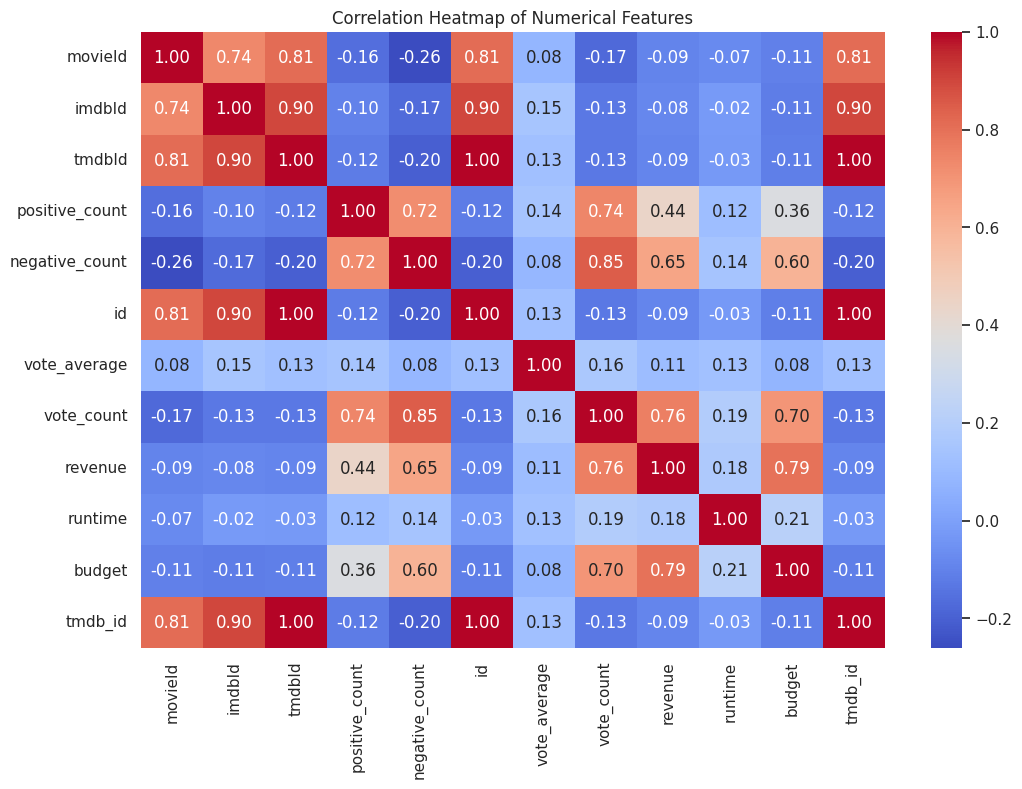

In [9]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()